In [114]:
import numpy as np
import tensorflow as tf
import cv2
import uuid
import os
import time
import json
import numpy as np
import matplotlib.pyplot as plt
import albumentations as alb
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D, MaxPooling2D
from keras.applications import VGG16
from tensorflow.keras.models import load_model


In [11]:
image_path=os.path.join('data1','images')
no_of_images=30

In [14]:
cam = cv2.VideoCapture(0)
for no in range(no_of_images):
    print(f'Collecting image:{no+1}')
    ret, frame=cam.read()
    image_name=os.path.join(image_path, f'{uuid.uuid1()}.jpg')
    cv2.imwrite(image_name,frame)
    cv2.imshow('frame',frame)
    time.sleep(0.5)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break;
cam.release()
cv2.destroyAllWindows()

In [ ]:
!labelme

In [2]:
# limit GPU
gpus=tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0],True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
def load_image(x):
    byte_img=tf.io.read_file(x)
    img=tf.io.decode_jpeg(byte_img)
    return img

In [11]:
for folder in ['train','test','val']:
    img_path=os.path.join('data1',folder,'images')
    for image in os.listdir(img_path):
        filename=image.split(".")[0]+'.json'
        existing_path=os.path.join('data1',folder,'labels',filename)
        if not os.path.exists(existing_path):
            print(existing_path)

data1\train\labels\779c2eb7-ee86-11ee-85cf-b42e996e5f84.json
data1\train\labels\77ee3dc5-ee86-11ee-9e73-b42e996e5f84.json
data1\train\labels\8bc01059-ee86-11ee-abda-b42e996e5f84.json
data1\train\labels\8e4a0db4-ee86-11ee-9359-b42e996e5f84.json
data1\train\labels\8e9ac571-ee86-11ee-b3ea-b42e996e5f84.json
data1\train\labels\8fe4583a-ee86-11ee-8da0-b42e996e5f84.json
data1\train\labels\90362c40-ee86-11ee-86a7-b42e996e5f84.json
data1\train\labels\90db0b9a-ee86-11ee-8bd8-b42e996e5f84.json
data1\train\labels\912d51fc-ee86-11ee-a113-b42e996e5f84.json
data1\train\labels\94b3694d-ee86-11ee-a150-b42e996e5f84.json
data1\train\labels\9505e4d4-ee86-11ee-b7de-b42e996e5f84.json
data1\train\labels\a37f6201-ee86-11ee-ae32-b42e996e5f84.json
data1\train\labels\a4240b72-ee86-11ee-a07a-b42e996e5f84.json
data1\train\labels\a4768362-ee86-11ee-872d-b42e996e5f84.json
data1\train\labels\a4c8e644-ee86-11ee-a685-b42e996e5f84.json
data1\train\labels\a5195e14-ee86-11ee-8603-b42e996e5f84.json
data1\train\labels\a56bf

In [12]:
!labelme

2024-03-30 19:06:57,066 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\Anonymous\.labelmerc


In [3]:
augmentor=alb.Compose([
    alb.RandomCrop(width=450, height=450),
    alb.HorizontalFlip(p=0.5),
    alb.RandomBrightnessContrast(p=0.2),
    alb.RandomGamma(p=0.2),
    alb.RGBShift(p=0.2),
    alb.VerticalFlip(p=0.5)],
    bbox_params=alb.BboxParams(format='albumentations',label_fields=['class_labels'])
)

In [15]:
img=cv2.imread(os.path.join('data1','train','images','9318a716-ee86-11ee-be15-b42e996e5f84.jpg'))

In [17]:
with open(os.path.join('data1','train','labels','9318a716-ee86-11ee-be15-b42e996e5f84.json')) as f:
    label=json.load(f)

In [24]:
label['shapes'][0]['points']

[[18.46153846153846, 213.84615384615384],
 [196.9230769230769, 376.15384615384613]]

In [25]:
coords=[0,0,0,0]

In [27]:
coords[0]=label['shapes'][0]['points'][0][0]
coords[1]=label['shapes'][0]['points'][0][1]
coords[2]=label['shapes'][0]['points'][1][0]
coords[3]=label['shapes'][0]['points'][1][1]

In [30]:
coords= list(np.divide(coords,[640,480,640,480]))

In [31]:
coords

[0.028846153846153844,
 0.4455128205128205,
 0.30769230769230765,
 0.7836538461538461]

In [33]:
augmented=augmentor(image=img,bboxes=[coords],class_labels=['face'])

In [38]:
augmented['image'].shape, augmented['bboxes']


((450, 450, 3),
 [(0.0, 0.17965811965811973, 0.39538461538461533, 0.5403418803418804)])

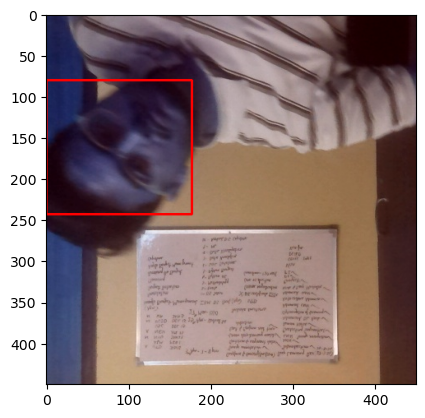

In [39]:
cv2.rectangle(
    augmented['image'],
    tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
    tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int)),
    (255,0,0),
    2
)
plt.imshow(augmented['image'])

In [58]:
# read each image 
# set initial coords 
# lebel path
# get coords from label path
# augme

for folder in ['train', 'test','val']:
    for image in os.listdir(os.path.join('data1',folder,'images')):
        img=cv2.imread(os.path.join('data1',folder,'images',image))
        
        coords=[0,0,0.00001,0.00001]
        label_path=os.path.join('data1',folder,'labels',f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open (label_path,'r') as f:
                label=json.load(f)
                coords[0]=label['shapes'][0]['points'][0][0]
                coords[1]=label['shapes'][0]['points'][0][1]
                coords[2]=label['shapes'][0]['points'][1][0]
                coords[3]=label['shapes'][0]['points'][1][1]
                coords=list(np.divide(coords,[640,480,640,480]))
        # print(label_path, coords)
        
        try:
            for x in range(60):
                augmented=augmentor(image=img,bboxes=[coords],class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data1',folder,'images',f'{image.split(".")[0]}.{x}.jpg'),augmented['image'])

                annotation={}
                annotation['image']=image
                # print(label_path)
                if os.path.exists(label_path):
                    if len(augmented['bboxes'])==0:
                        annotation['bbox']=[0,0,0,0]
                        annotation['class']=0
                    else:
                        annotation['bbox']=augmented['bboxes'][0]
                        annotation['class']=1
                else:
                    annotation['bbox']=[0,0,0,0]
                    annotation['class']=0 

                with open(os.path.join('aug_data1',folder,'labels',f'{image.split(".")[0]}.{x}.json'),'w') as f:
                    json.dump(annotation,f)
        except Exception as e:
            print(e)          

In [6]:
train_images=tf.data.Dataset.list_files('aug_data1\\train\\images\\*jpg',shuffle=False)
train_images=train_images.map(load_image)
train_images=train_images.map(lambda x: tf.image.resize(x,(120,120)))
train_images=train_images.map(lambda x: x/255)

test_images=tf.data.Dataset.list_files('aug_data1\\test\\images\\*jpg',shuffle=False)
test_images=test_images.map(load_image)
test_images=test_images.map(lambda x: tf.image.resize(x,(120,120)))
test_images=test_images.map(lambda x: x/255)

val_images=tf.data.Dataset.list_files('aug_data1\\val\\images\\*jpg',shuffle=False)
val_images=val_images.map(load_image)
val_images=val_images.map(lambda x: tf.image.resize(x,(120,120)))
val_images=val_images.map(lambda x: x/255)

In [7]:
train_images.as_numpy_iterator().next()

array([[[0.18694852, 0.23866421, 0.25557598],
        [0.20441176, 0.24754901, 0.25539216],
        [0.20490196, 0.25196078, 0.25196078],
        ...,
        [0.6068627 , 0.7794118 , 0.7911765 ],
        [0.61764705, 0.79148287, 0.8032476 ],
        [0.6146446 , 0.78186274, 0.78952205]],

       [[0.2026348 , 0.24577206, 0.2536152 ],
        [0.20042892, 0.24356617, 0.25140932],
        [0.19607843, 0.23921569, 0.24705882],
        ...,
        [0.6240196 , 0.79509807, 0.80735296],
        [0.61960787, 0.79068625, 0.7959559 ],
        [0.625674  , 0.79767156, 0.80177695]],

       [[0.20686275, 0.25      , 0.25784314],
        [0.20294118, 0.24607843, 0.25392157],
        [0.18976715, 0.2329044 , 0.24074756],
        ...,
        [0.643076  , 0.79601717, 0.815625  ],
        [0.63572305, 0.79172796, 0.8       ],
        [0.6322304 , 0.79172796, 0.7995711 ]],

       ...,

       [[0.21047795, 0.24675246, 0.2521446 ],
        [0.19901961, 0.21911764, 0.22941177],
        [0.1721201 , 0

In [8]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding='utf=8') as f:
        label=json.load(f)
    return [label['class']], label['bbox']

In [9]:
train_label=tf.data.Dataset.list_files('aug_data1\\train\\labels\\*json',shuffle=False)
train_label=train_label.map(lambda x:tf.py_function(load_labels, [x], [tf.uint8,tf.float16]))

In [10]:
test_label=tf.data.Dataset.list_files('aug_data1\\test\\labels\\*json',shuffle=False)
test_label=test_label.map(lambda x:tf.py_function(load_labels, [x], [tf.uint8,tf.float16]))

In [11]:
val_label=tf.data.Dataset.list_files('aug_data1\\val\\labels\\*json',shuffle=False)
val_label=val_label.map(lambda x:tf.py_function(load_labels, [x], [tf.uint8,tf.float16]))

In [12]:
train_label.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.4165, 0.3435, 0.7583, 0.745 ], dtype=float16))

In [13]:
len(train_images),len(test_images), len(val_images),len(train_label),len(test_label), len(val_label)

(3780, 840, 780, 3780, 840, 780)

In [14]:
# combine the labels and images
train=tf.data.Dataset.zip((train_images,train_label))
train=train.shuffle(5000)
train=train.batch(8)
train=train.prefetch(4)

In [15]:
test=tf.data.Dataset.zip((test_images,test_label))
test=test.shuffle(1200)
test=test.batch(8)
test=test.prefetch(4)

In [16]:
val=tf.data.Dataset.zip((val_images,val_label))
val=val.shuffle(1000)
val=val.batch(8)
val=val.prefetch(4)

In [17]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [18]:
train.as_numpy_iterator().next()

(array([[[[0.5912377 , 0.7667279 , 0.768076  ],
          [0.5815564 , 0.76256126, 0.7606005 ],
          [0.58884805, 0.77052695, 0.79197305],
          ...,
          [0.2372549 , 0.28186274, 0.29705882],
          [0.2336397 , 0.29932597, 0.32677695],
          [0.23523284, 0.3146446 , 0.3346201 ]],
 
         [[0.59479165, 0.7708946 , 0.7730392 ],
          [0.5926471 , 0.7730392 , 0.7651961 ],
          [0.5966299 , 0.7730392 , 0.78253675],
          ...,
          [0.23088235, 0.2857843 , 0.297549  ],
          [0.23682599, 0.3074142 , 0.32310048],
          [0.22843137, 0.30802697, 0.32071078]],
 
         [[0.59883577, 0.77530634, 0.7913603 ],
          [0.59957105, 0.7721201 , 0.7760417 ],
          [0.5996324 , 0.7721814 , 0.7839461 ],
          ...,
          [0.24313726, 0.29803923, 0.3019608 ],
          [0.225     , 0.29411766, 0.30245098],
          [0.23106618, 0.31194854, 0.32077205]],
 
         ...,
 
         [[0.26170343, 0.25183824, 0.19846813],
          [0.38811

In [19]:
# view 
sample_image=train.as_numpy_iterator()

In [20]:
res=sample_image.next()
res[1][1]

array([[0.3027, 0.0863, 0.633 , 0.435 ],
       [0.3098, 0.2793, 0.633 , 0.6265],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.5864, 0.1404, 0.9404],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.1031, 0.2957, 0.4673],
       [0.2751, 0.3276, 0.622 , 0.774 ],
       [0.3855, 0.499 , 0.7256, 0.8564]], dtype=float16)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


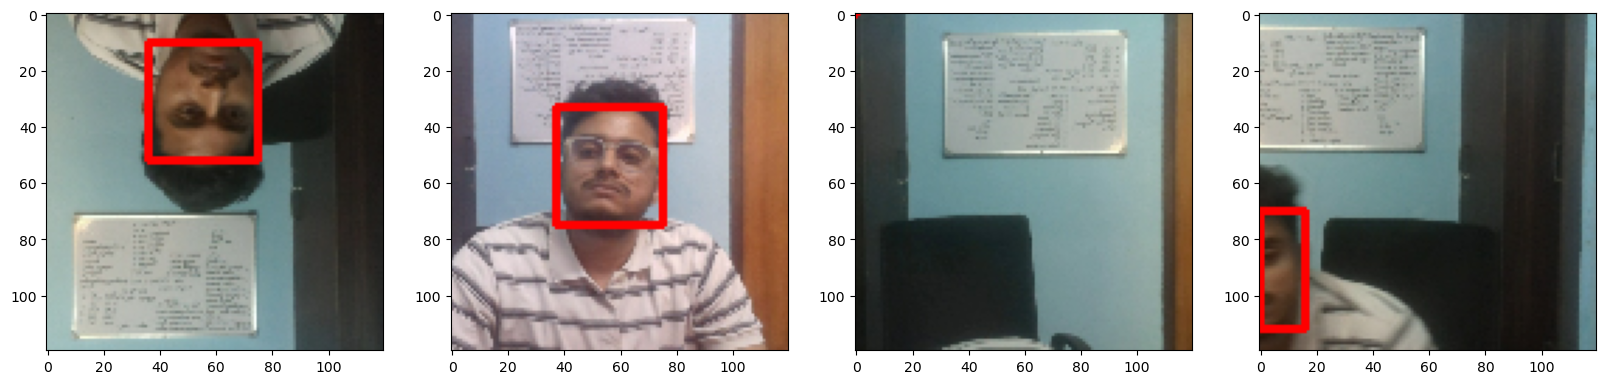

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image=res[0][idx]
    sample_coords=res[1][1][idx]
    sample_image=sample_image.copy()
    cv2.rectangle(
        sample_image,
        tuple(np.multiply(sample_coords[:2],[120,120]).astype(int)),
        tuple(np.multiply(sample_coords[2:],[120,120]).astype(int)),
        (255,0,0),
        2
    )
    ax[idx].imshow(sample_image)

# Build and train the deep learning model

In [22]:
vgg= VGG16(include_top=False)

In [23]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [24]:
def build_model():
    input_layer=Input(shape=(120,120,3))
    vgg=VGG16(include_top=False)(input_layer)

    f1=GlobalMaxPooling2D()(vgg)
    class1=Dense(2048,activation='relu')(f1)
    class2=Dense(1, activation='sigmoid')(class1)

    f2=GlobalMaxPooling2D()(vgg)
    regress1=Dense(2048,activation='relu')(f2)
    regress2=Dense(4, activation='sigmoid')(regress1)

    facetracker=Model(inputs=input_layer, outputs=[class2,regress2])
    return facetracker

In [25]:
facetracker=build_model()

In [26]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [27]:
x,y = train.as_numpy_iterator().next()
x.shape

(8, 120, 120, 3)

In [28]:
classes, coords = facetracker.predict(x)

1/1 [==============================] - 13s 13s/step


In [29]:
classes.shape, coords.shape

((8, 1), (8, 4))

In [65]:
# loss
batches_per_epochs=len(train)
lr_decay=(1./0.75-1)/batches_per_epochs
lr_decay

0.0007047216349541929

In [66]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [67]:
def localization_loss(y_true,yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2]-yhat[:,:2]))

    h_true=y_true[:,3]-y_true[:,1]
    w_true=y_true[:,2]-y_true[:,0]

    h_pred=yhat[:,3]-yhat[:,1]
    w_pred=yhat[:,2]-yhat[:,0]

    delta_size=tf.reduce_sum(tf.square(w_true-w_pred)+tf.square(h_true-h_pred))
    return delta_coord + delta_size

In [68]:
classloss=tf.keras.losses.BinaryCrossentropy()
regressloss=localization_loss

In [69]:
localization_loss(y[1],coords).numpy()

3.4039218

In [85]:
# Train Neural network 
class FaceTracker(Model):
    def __init__(self, facetracker, **kwargs):
        super().__init__(**kwargs)
        self.model=facetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs=classloss
        self.lloss= localizationloss
        self.opt=opt

    def train_step(self, batch, **kwargs):
        x,y = batch
        with tf.GradientTape() as tape:
            classes, coords = self.model(x,training=True)

            batch_classloss=self.closs(y[0],classes)
            batch_localizationloss=self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss=batch_localizationloss+0.5*batch_classloss
            grad=tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss": batch_localizationloss}

    def test_step(self, batch, **kwargs):
        classes, coords=self.model(x,training=True)

        batch_classloss=self.closs(y[0], classes)
        batch_localizationloss=self.lloss(tf.cast(y[1], tf.float32), coords)

        total_loss=batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss": batch_localizationloss}
        

    def call(self, x, **kwargs):
        return self.model(x,**kwargs)

In [86]:
model=FaceTracker(facetracker)
model.compile(opt, classloss, regressloss)

In [87]:
logdir='logdir1'

In [88]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [95]:
hist=model.fit(train,epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
473/473 [==============================] - 23s 43ms/step - total_loss: 0.0017 - class_loss: 2.7905e-04 - regress_loss: 0.0016 - val_total_loss: 2.7640e-04 - val_class_loss: 8.8156e-06 - val_regress_loss: 2.7199e-04
Epoch 2/10
473/473 [==============================] - 23s 43ms/step - total_loss: 0.0026 - class_loss: 0.0011 - regress_loss: 0.0020 - val_total_loss: 0.0020 - val_class_loss: 1.9510e-05 - val_regress_loss: 0.0019
Epoch 3/10
473/473 [==============================] - 24s 45ms/step - total_loss: 0.0016 - class_loss: 3.3357e-04 - regress_loss: 0.0014 - val_total_loss: 5.5713e-04 - val_class_loss: 1.5135e-05 - val_regress_loss: 5.4956e-04
Epoch 4/10
473/473 [==============================] - 24s 45ms/step - total_loss: 0.0041 - class_loss: 0.0022 - regress_loss: 0.0030 - val_total_loss: 6.9849e-04 - val_class_loss: 2.6270e-04 - val_regress_loss: 5.6714e-04
Epoch 5/10
473/473 [==============================] - 26s 47ms/step - total_loss: 0.0042 - class_loss: 0.0021 - 

In [96]:
hist=hist.history

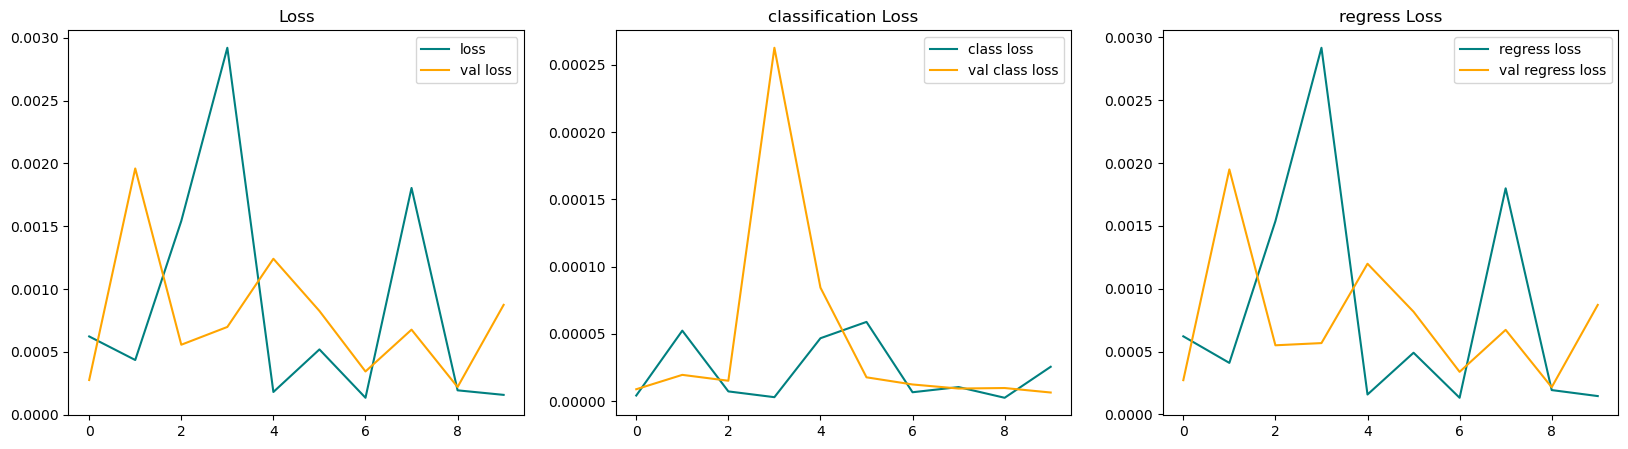

In [99]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist['total_loss'],color='teal', label='loss')
ax[0].plot(hist['val_total_loss'],color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist['class_loss'],color='teal', label='class loss')
ax[1].plot(hist['val_class_loss'],color='orange', label='val class loss')
ax[1].title.set_text('classification Loss')
ax[1].legend()

ax[2].plot(hist['regress_loss'],color='teal', label='regress loss')
ax[2].plot(hist['val_regress_loss'],color='orange', label='val regress loss')
ax[2].title.set_text('regress Loss')
ax[2].legend()

plt.show()

In [100]:
test_data= test.as_numpy_iterator()

In [110]:
test_sample=test_data.next()

In [111]:
yhat= facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 20ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


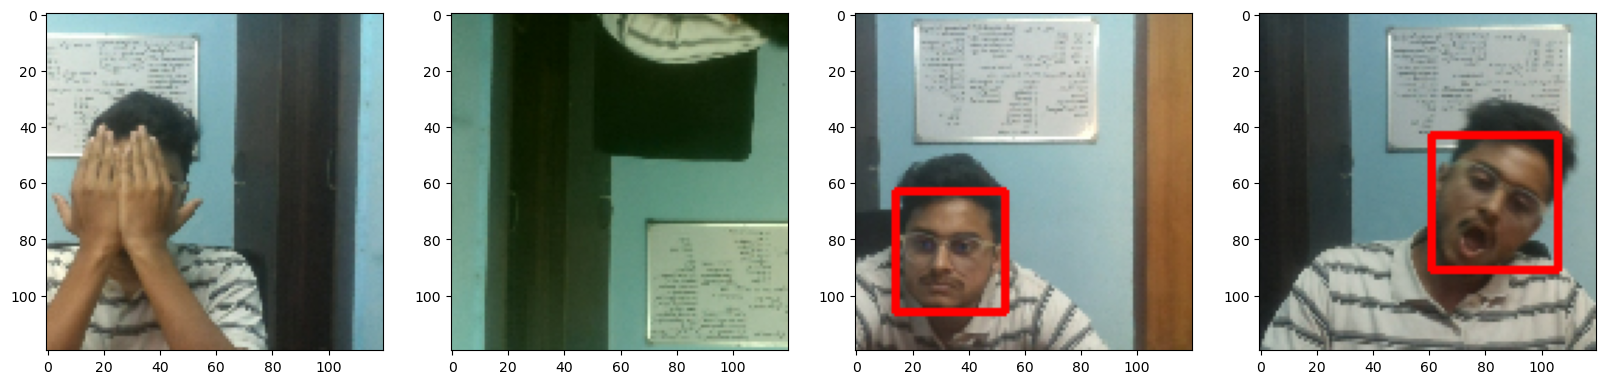

In [112]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image=test_sample[0][idx]
    sample_coords= yhat[1][idx]
    sample_image=sample_image.copy()
    if yhat[0][idx]>0.9:
        cv2.rectangle(
            sample_image,
            tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
            tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
            (255,0,0),
            2
        )
    ax[idx].imshow(sample_image)

In [115]:
facetracker.save('facetracker_expert.h5')

In [116]:
facetracker=load_model('facetracker_expert.h5')

In [121]:
cam = cv2.VideoCapture(0)
while cam.isOpened():
    _,frame=cam.read()
    frame=frame[50:500,50:500,:]

    rgb=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb,(120,120))

    yhat=facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords=yhat[1][0]

    if yhat[0]>0.5:
        cv2.rectangle(
            frame,
            tuple(np.multiply(sample_coords[:2],[450,450]).astype(int)),
            tuple(np.multiply(sample_coords[2:],[450,450]).astype(int)),
            (255,0,0),
            2
        )
        cv2.rectangle(
            frame,
            tuple(np.add(np.multiply(sample_coords[:2],[450,450]).astype(int), [0,-30])),
            tuple(np.add(np.multiply(sample_coords[:2],[450,450]).astype(int), [80,0])),
            (255,0,0),
            -1
        )

        cv2.putText(
            frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),[0,-5])),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA
        )

    cv2.imshow('face tracker', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cam.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 18ms/step
